## Prevendo a Potabilidade da Agua by Kaggle

1. Entendendo o Problema 

O acesso à água potável é essencial para a saúde, um direito humano básico e um componente de uma política efetiva de proteção à saúde. Isso é importante como uma questão de saúde e desenvolvimento em nível nacional, regional e local. Em algumas regiões, foi demonstrado que os investimentos em abastecimento de água e saneamento podem gerar um benefício econômico líquido, uma vez que as reduções nos efeitos adversos à saúde e nos custos de saúde superam os custos de realização das intervenções.

Precisamos Prever a Potabilidade da Água com base nas features disponibilizadas.

In [ ]:
# importando as bibliotecas 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [ ]:
#Conexão com os Dados
url = '/content/water_potability.csv'
df = pd.read_csv(url)

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.shape

(3276, 10)

In [ ]:
#checando dados missing
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

##Atenção

Para variavel de classe, trata-se de problema de classificacao 
usar algoritmo de aprendizagem supervisionada

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
#conhecendo os dominios
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [ ]:
for column in df.columns:
    print('{} tem {} tem valores unicos'.format(column, len(df[column].unique())))

ph tem 2786 tem valores unicos
Hardness tem 3276 tem valores unicos
Solids tem 3276 tem valores unicos
Chloramines tem 3276 tem valores unicos
Sulfate tem 2496 tem valores unicos
Conductivity tem 3276 tem valores unicos
Organic_carbon tem 3276 tem valores unicos
Trihalomethanes tem 3115 tem valores unicos
Turbidity tem 3276 tem valores unicos
Potability tem 2 tem valores unicos


In [ ]:
#descrevendo o dataset
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Text(0, 0.5, 'Contagem')

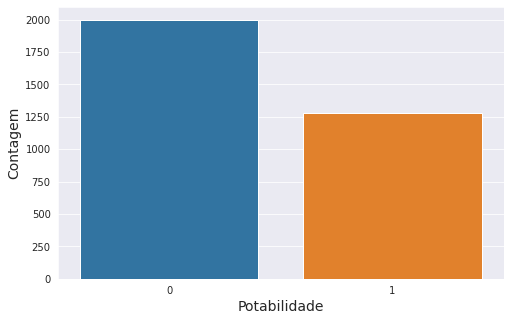

In [ ]:
#contagem de valores
pot_lbl = df.Potability.value_counts()

#plotando

plt.figure(figsize = (8, 5))
sns.barplot(pot_lbl.index, pot_lbl);
plt.xlabel('Potabilidade', fontsize = 14)
plt.ylabel('Contagem', fontsize = 14)


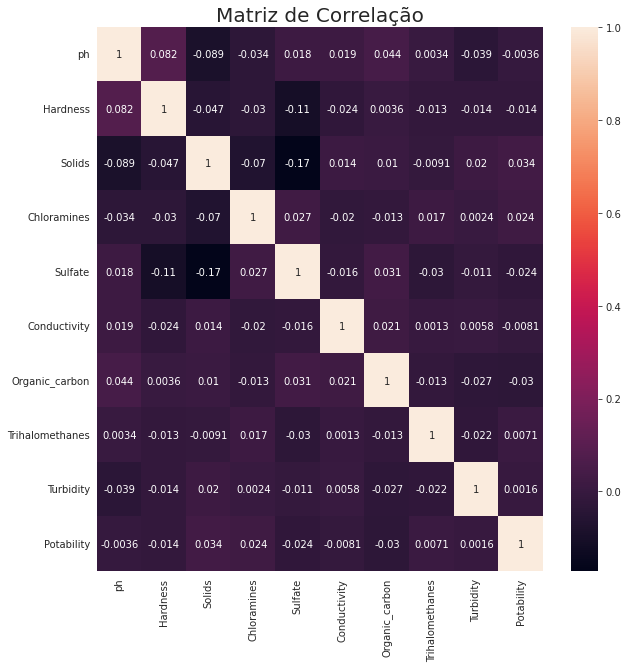

In [ ]:
#matriz de correlação
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot=True)
plt.title('Matriz de Correlação', fontsize =20);

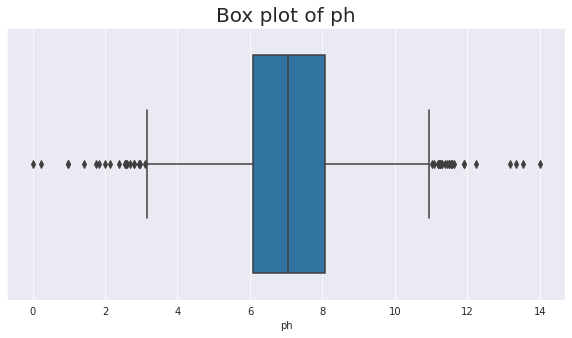

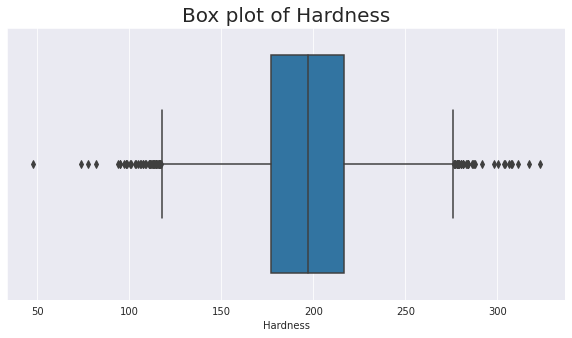

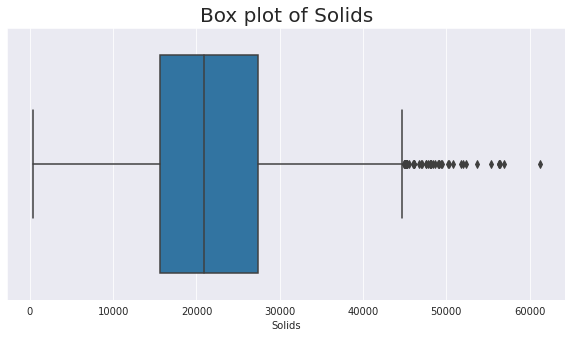

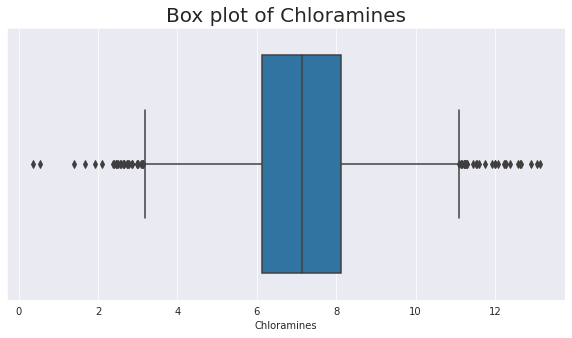

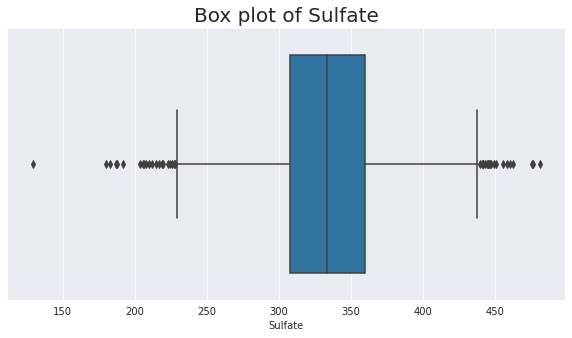

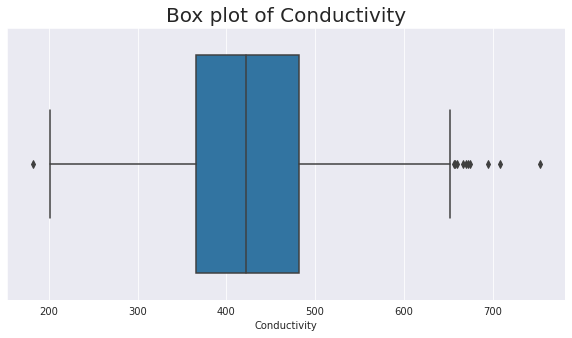

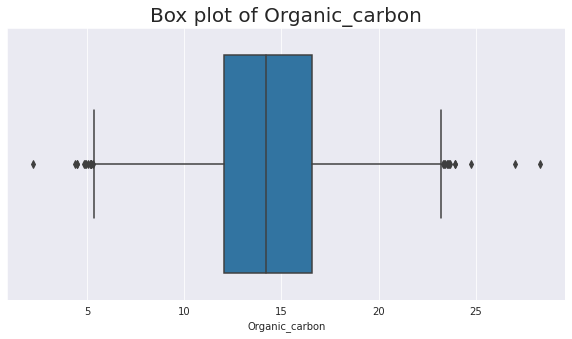

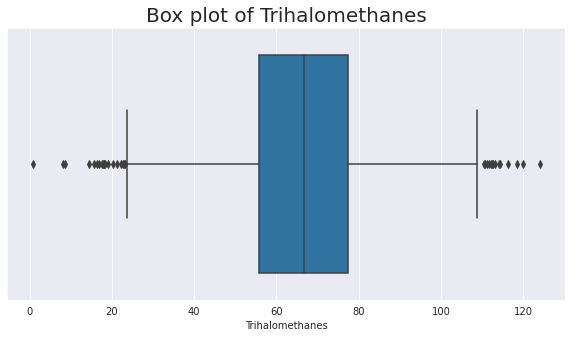

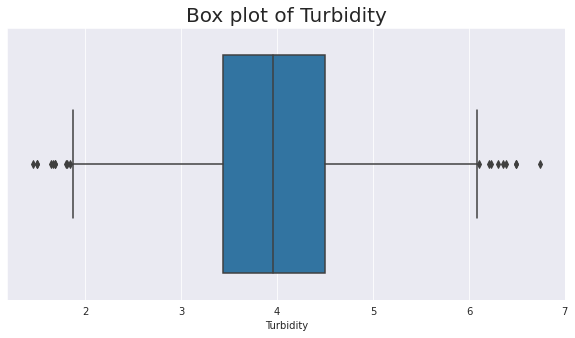

In [ ]:
for column in df.columns[:-1]:
    plt.figure(figsize =(10, 5))
    sns.boxplot(df[column])
    plt.title('Box plot of {}'.format(column), fontsize=20)

## Pré Processamento dos dados

In [ ]:
for feature in df.columns:
    print('{} \t {:.1f}% of null values'.format(feature, (df[feature].isnull().sum() / len(df)) * 100))

ph 	 15.0% of null values
Hardness 	 0.0% of null values
Solids 	 0.0% of null values
Chloramines 	 0.0% of null values
Sulfate 	 23.8% of null values
Conductivity 	 0.0% of null values
Organic_carbon 	 0.0% of null values
Trihalomethanes 	 4.9% of null values
Turbidity 	 0.0% of null values
Potability 	 0.0% of null values


## Imputação pela Média

In [ ]:
#preparando o modelo 

ph_mean = df[df['Potability'] == 0]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['ph'].isna()), 'ph'] = ph_mean

ph_mean_1 = df[df['Potability'] == 1]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['ph'].isna()), 'ph'] = ph_mean_1

sulf_mean = df[df['Potability'] == 0]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Sulfate'].isna()), 'Sulfate'] = sulf_mean

sulf_mean_1 = df[df['Potability'] == 1]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Sulfate'].isna()), 'Sulfate'] = sulf_mean_1

traih_mean = df[df['Potability'] == 0]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = traih_mean

trah_mean_1 = df[df['Potability'] == 1]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = trah_mean_1

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

In [ ]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (2620, 9)
X_test shape:  (656, 9)


## Padronização dos Dados

In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## Construção e Avaliação de Máquinas Preditivas com Machine Learning

In [ ]:
models_acc = []

models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), GaussianNB(), SVC()]

for model in models:
    model.fit(X_train, y_train)

    pred = model.predict(X_test)

    models_acc.append(accuracy_score(y_test, pred))

In [ ]:
#criando um dataframe
res = pd.DataFrame({
    'Model Accuracy': models_acc,
    'Model Name': ['LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier', 'GaussianNB', 'SVC']

})

In [ ]:
res

,Model Accuracy,Model Name
0,0.626524,LogisticRegression
1,0.635671,KNeighborsClassifier
2,0.800305,RandomForestClassifier
3,0.615854,GaussianNB
4,0.682927,SVC


Text(0, 0.5, 'Model Name')

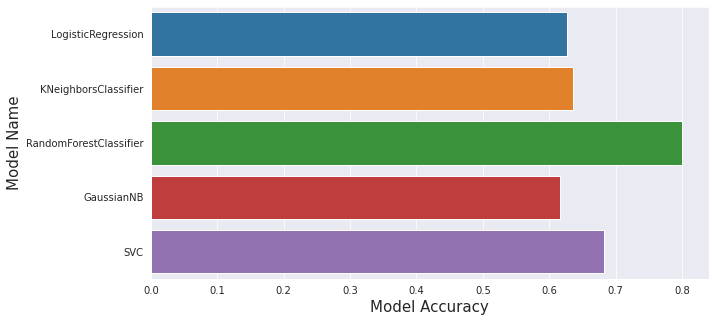

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(res['Model Accuracy'], res['Model Name'])
plt.xlabel('Model Accuracy', fontsize = 15)
plt.ylabel('Model Name', fontsize = 15)